# 双边滤波

In [10]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time
from numpy.linalg import cholesky
import scipy.signal as signal

In [11]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [12]:
def bilateralFilter(img,R):
#    block = random((2*r+1,2*r+1,3),255)
#    block[r-1:,r-1:] = 10
    r = R
    sd = 100
    sr = sd*0.4
    m,n = 2*r+1,2*r+1
    x,y = np.meshgrid(range(n),range(m))
    dd = -((y-r)**2+(x-r)**2)/2./sd
    tmp = (dd>=dd[r,0])
    def bilateralCore(block):
        rr = -np.linalg.norm(block-block[r,r],axis=2)/2./sr
        core = np.power(np.e,dd+rr)*tmp
        core = (core/core.sum())[...,None]
#        if random(1,1000)[0][0]>990:show([core[...,0],block])
        return (core*block).sum(0).sum(0)
    new = filterr(img,R,bilateralCore)
    return new

In [13]:
def getFilterImg(img):
    maxr = 50
    m,n = img.shape[:2]
    new = np.zeros((m+2*maxr,n+2*maxr,3),np.uint8)
    u,r,d,l = maxr,n+maxr,m+maxr,maxr
    new[u:d,l:r] = img
    new[:u] = new[u:u+maxr][::-1]
    new[:,r:] = new[:,r-maxr:r][:,::-1]
    new[d:] = new[d-maxr:d][::-1]
    new[:,:l] = new[:,l:l+maxr][:,::-1]
#    show(new)
    return new

In [14]:
def filterr(img,R,f):
    '''
    10s 太慢
    '''
    fi = getFilterImg(img)
    maxr = 50
    m,n = img.shape[:2]
    u,r,d,l = maxr,n+maxr,m+maxr,maxr
    new = np.zeros((m,n,3),np.uint8)
    for i,y in enumerate(range(maxr,maxr+m)):
        for j,x in enumerate(range(maxr,maxr+n)):
            v = f(fi[y-R:y+R+1,x-R:x+R+1])
            new[i][j] = v
    return new

In [15]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [16]:
def noise_pepper(img,a):
    m,n = img.shape[0],img.shape[1]
    R = np.random.randn(m,n)
    dst = np.zeros(img.shape,dtype=np.float64)
    rgb = np.float64(img)
#     df_R = DataFrame(R)
    idx = R <= a
    dst[idx] = rgb[idx]
    return dst

In [17]:
src_noise_pepper = noise_pepper(gray,0.01)
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [19]:
dst = bilateralFilter(rgb,5)

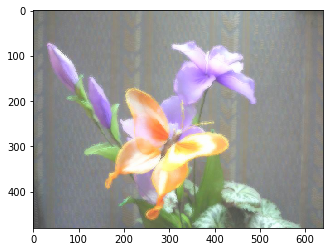

In [20]:
plt.imshow(dst)